In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import v_measure_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import io
from google.colab import files

# Загружаем файл
uploaded = files.upload()

# Находим CSV файл
csv_files = [f for f in uploaded.keys() if f.endswith('.csv')]
if not csv_files:
    raise ValueError("Не найден CSV файл в загруженных файлах")

# Берем первый CSV файл
csv_file = csv_files[0]
print(f"Загружаем файл: {csv_file}")

# Читаем данные
df = pd.read_csv(io.BytesIO(uploaded[csv_file]))
print(f"Данные загружены. Размер: {df.shape}")
print(df.head())

Saving NHANES_age_prediction.csv to NHANES_age_prediction.csv
Загружаем файл: NHANES_age_prediction.csv
Данные загружены. Размер: (2278, 10)
      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [ ]:
print(df.head())
print(df.info())

numeric_cols = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
X = df[numeric_cols].copy()
X = X.fillna(X.mean())

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Создаем 3 возрастные категории для визуализации
def create_age_category(age):
    if age < 30:
        return 'Young (0-29)'
    elif age < 60:
        return 'Middle-aged (30-59)'
    else:
        return 'Senior (60+)'

df['age_category'] = df['RIDAGEYR'].apply(create_age_category)
y = df['age_category']

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN         age_category  
0   150.0  14.91         Senior (60+)  
1    80.0   3.85         Young (0-29)  
2    68.0   6.14         Young (0-29)  
3    84.0  16.15  Middle-aged (30-59)  
4    81.0  10.92  Middle-aged (30-59)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEQN          2278 non-null   float64
 1   age_group     2278 non-null   object 
 2   RIDAGEYR      2278 

In [ ]:
# Получаем уникальные категории и цвета
age_categories = sorted(df['age_category'].unique())
colors = ["navy", "turquoise", "darkorange"]
color_map = {cat: color for cat, color in zip(age_categories, colors)}

# Функция для создания стандартной визуализации
def plot_dim_reduction(X_new, method_name, y=y, colors_map=color_map):
    plt.figure(figsize=(12, 8))
    lw = 2

    for category in age_categories:
        mask = (y == category)
        plt.scatter(
            X_new[mask, 0],
            X_new[mask, 1],
            color=colors_map[category],
            alpha=0.8,
            lw=lw,
            label=category,
            s=50
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(f"{method_name} - Projection by Age Category")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


1. PRINCIPAL COMPONENT ANALYSIS (PCA)
Explained variance ratio: [0.26754668 0.16589289]
Total explained variance: 43.34%
PCA components shape: (2278, 2)


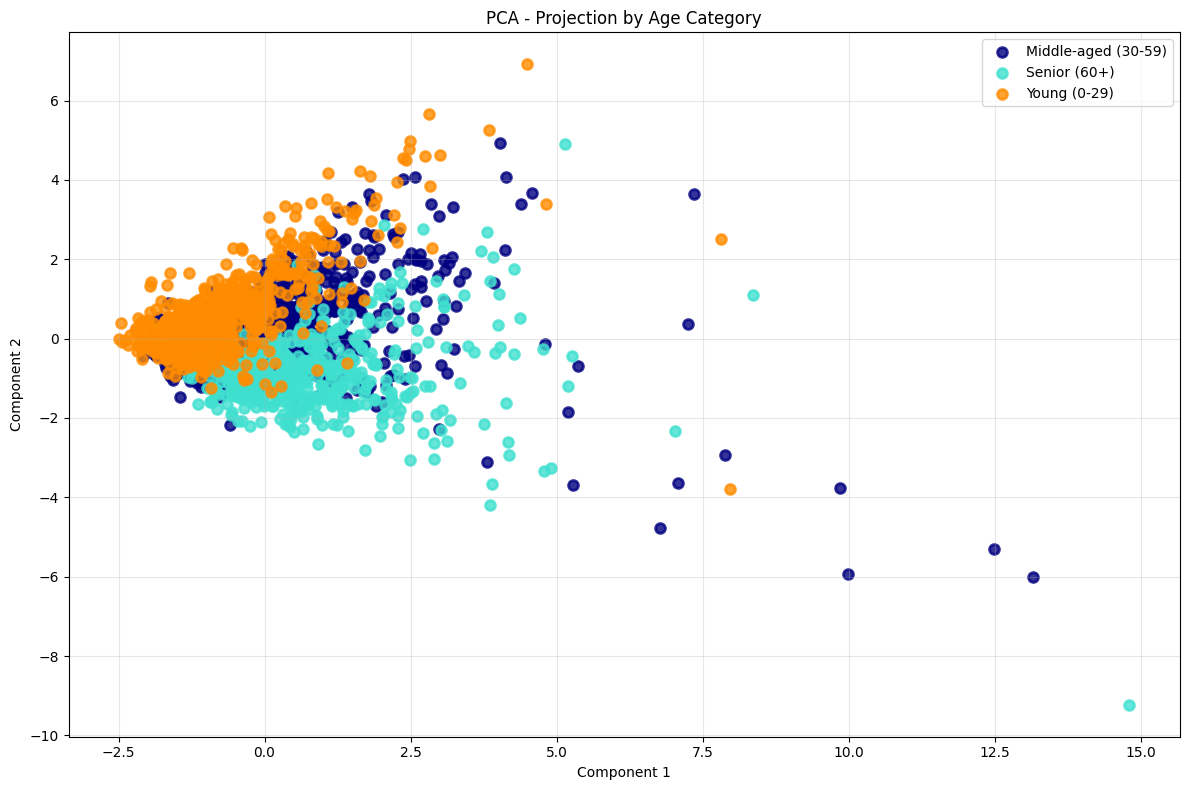

In [ ]:
print("=" * 60)
print("1. PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 60)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")
print(f"PCA components shape: {X_pca.shape}")

plot_dim_reduction(X_pca, "PCA")


2. FAST INDEPENDENT COMPONENT ANALYSIS (FastICA)
ICA components shape: (2278, 2)
ICA convergence: 7 iterations


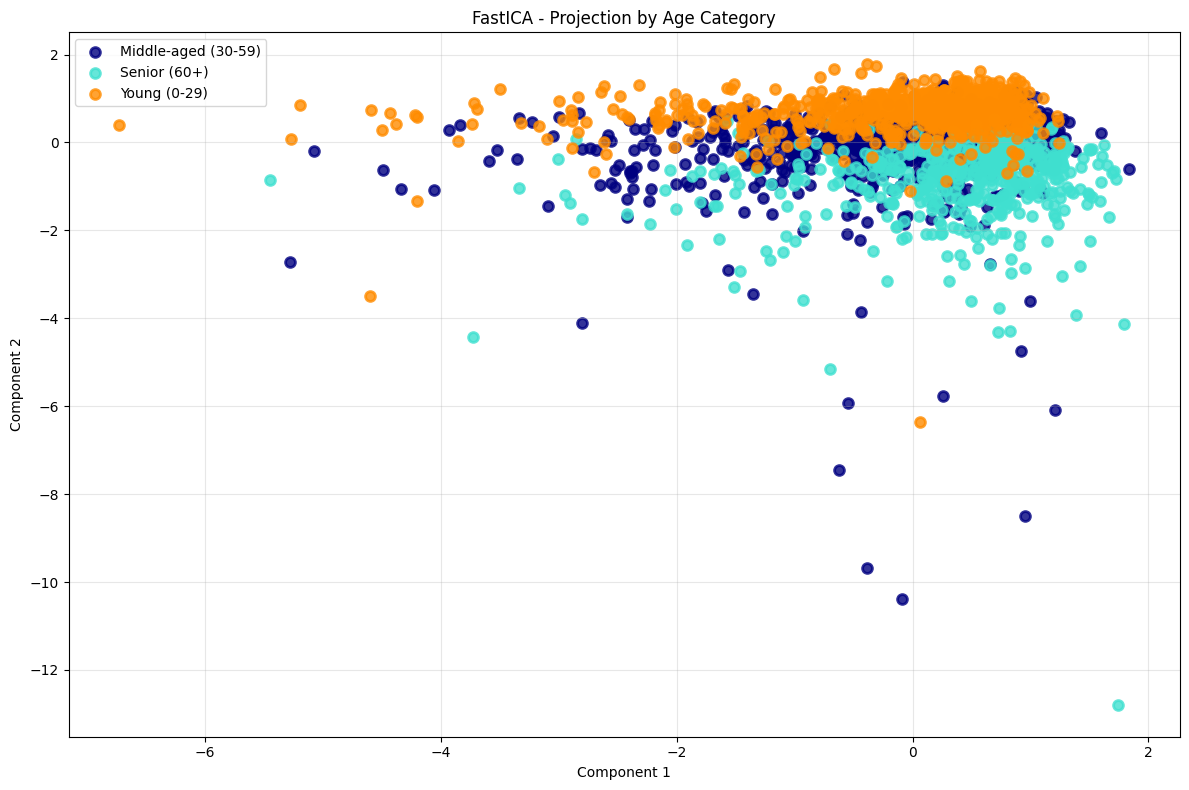

In [ ]:
print("\n" + "=" * 60)
print("2. FAST INDEPENDENT COMPONENT ANALYSIS (FastICA)")
print("=" * 60)

fast_ica = FastICA(n_components=2, random_state=42, max_iter=500)
X_ica = fast_ica.fit_transform(X_scaled)

print(f"ICA components shape: {X_ica.shape}")
print(f"ICA convergence: {fast_ica.n_iter_} iterations")

plot_dim_reduction(X_ica, "FastICA")


3. KERNEL PCA (RBF Kernel)
Kernel PCA components shape: (2278, 2)


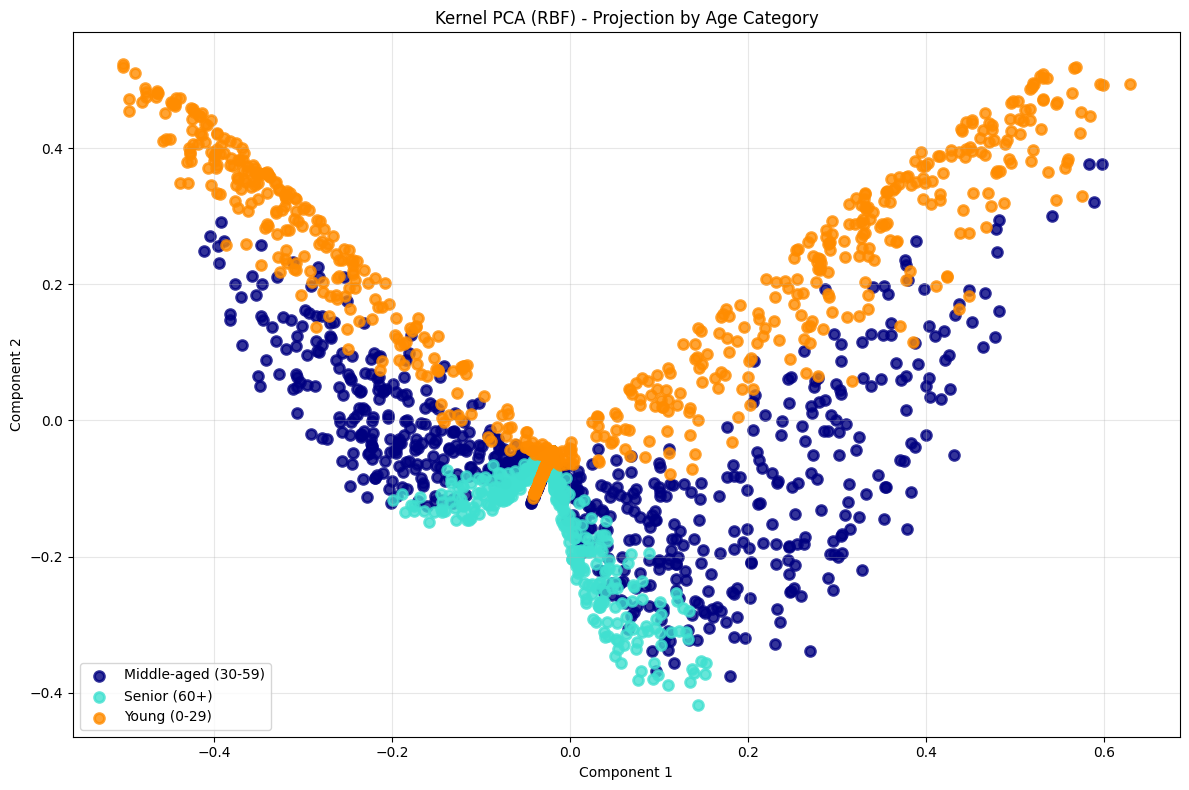

In [ ]:
print("\n" + "=" * 60)
print("3. KERNEL PCA (RBF Kernel)")
print("=" * 60)

# Найдем оптимальный gamma через кросс-валидацию (упрощенный вариант)
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=1, random_state=42)
X_kpca = rbf_pca.fit_transform(X_scaled)

print(f"Kernel PCA components shape: {X_kpca.shape}")

plot_dim_reduction(X_kpca, "Kernel PCA (RBF)")



4. t-SNE (t-Distributed Stochastic Neighbor Embedding)
Initial shape of X: (2278, 8)
New shape of X: (2278, 2)
Kullback-Leibler divergence: 0.8684
Number of iterations: 999


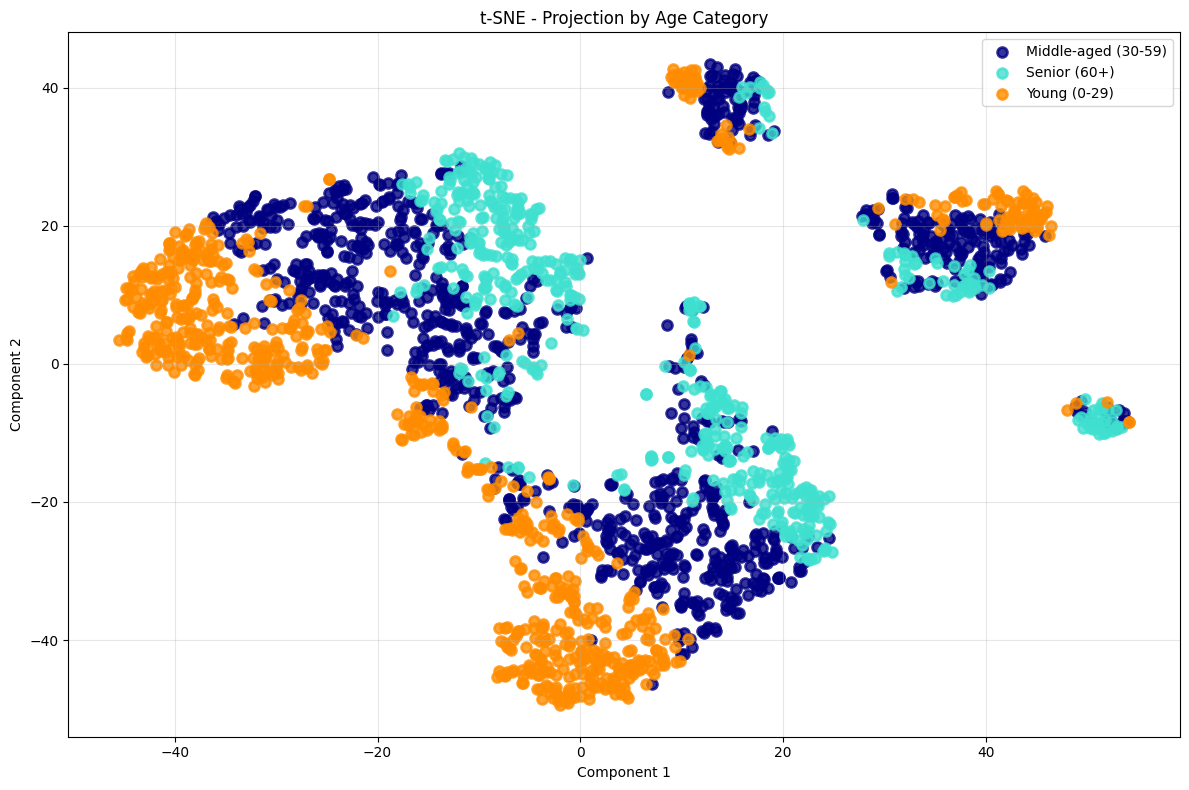

In [ ]:
print("\n" + "=" * 60)
print("4. t-SNE (t-Distributed Stochastic Neighbor Embedding)")
print("=" * 60)

tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print(f"Initial shape of X: {X_scaled.shape}")
print(f"New shape of X: {X_tsne.shape}")
print(f"Kullback-Leibler divergence: {tsne.kl_divergence_:.4f}")
print(f"Number of iterations: {tsne.n_iter_}")

plot_dim_reduction(X_tsne, "t-SNE")


5. DBSCAN FOR ANOMALY DETECTION

Данные: 2278 образцов, 8 признаков
Рекомендовано min_samples: 10


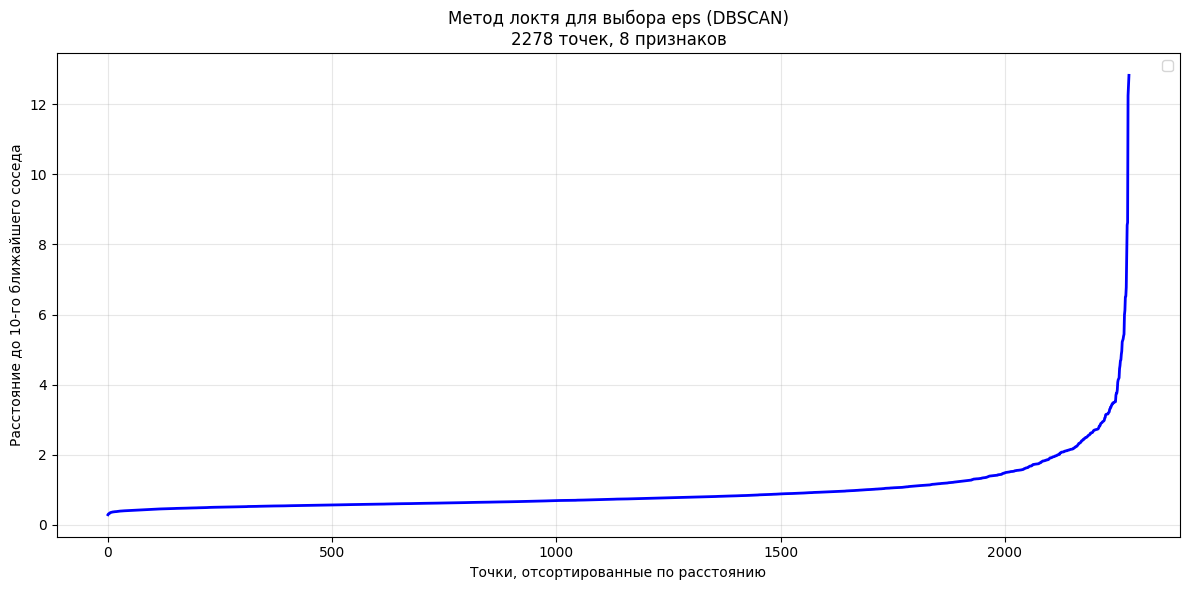


Оптимальный eps (метод локтя): 1.856 на точке 2096/2278

ТЕСТИРОВАНИЕ РАЗНЫХ ПАРАМЕТРОВ ДЛЯ ПОИСКА АНОМАЛИЙ


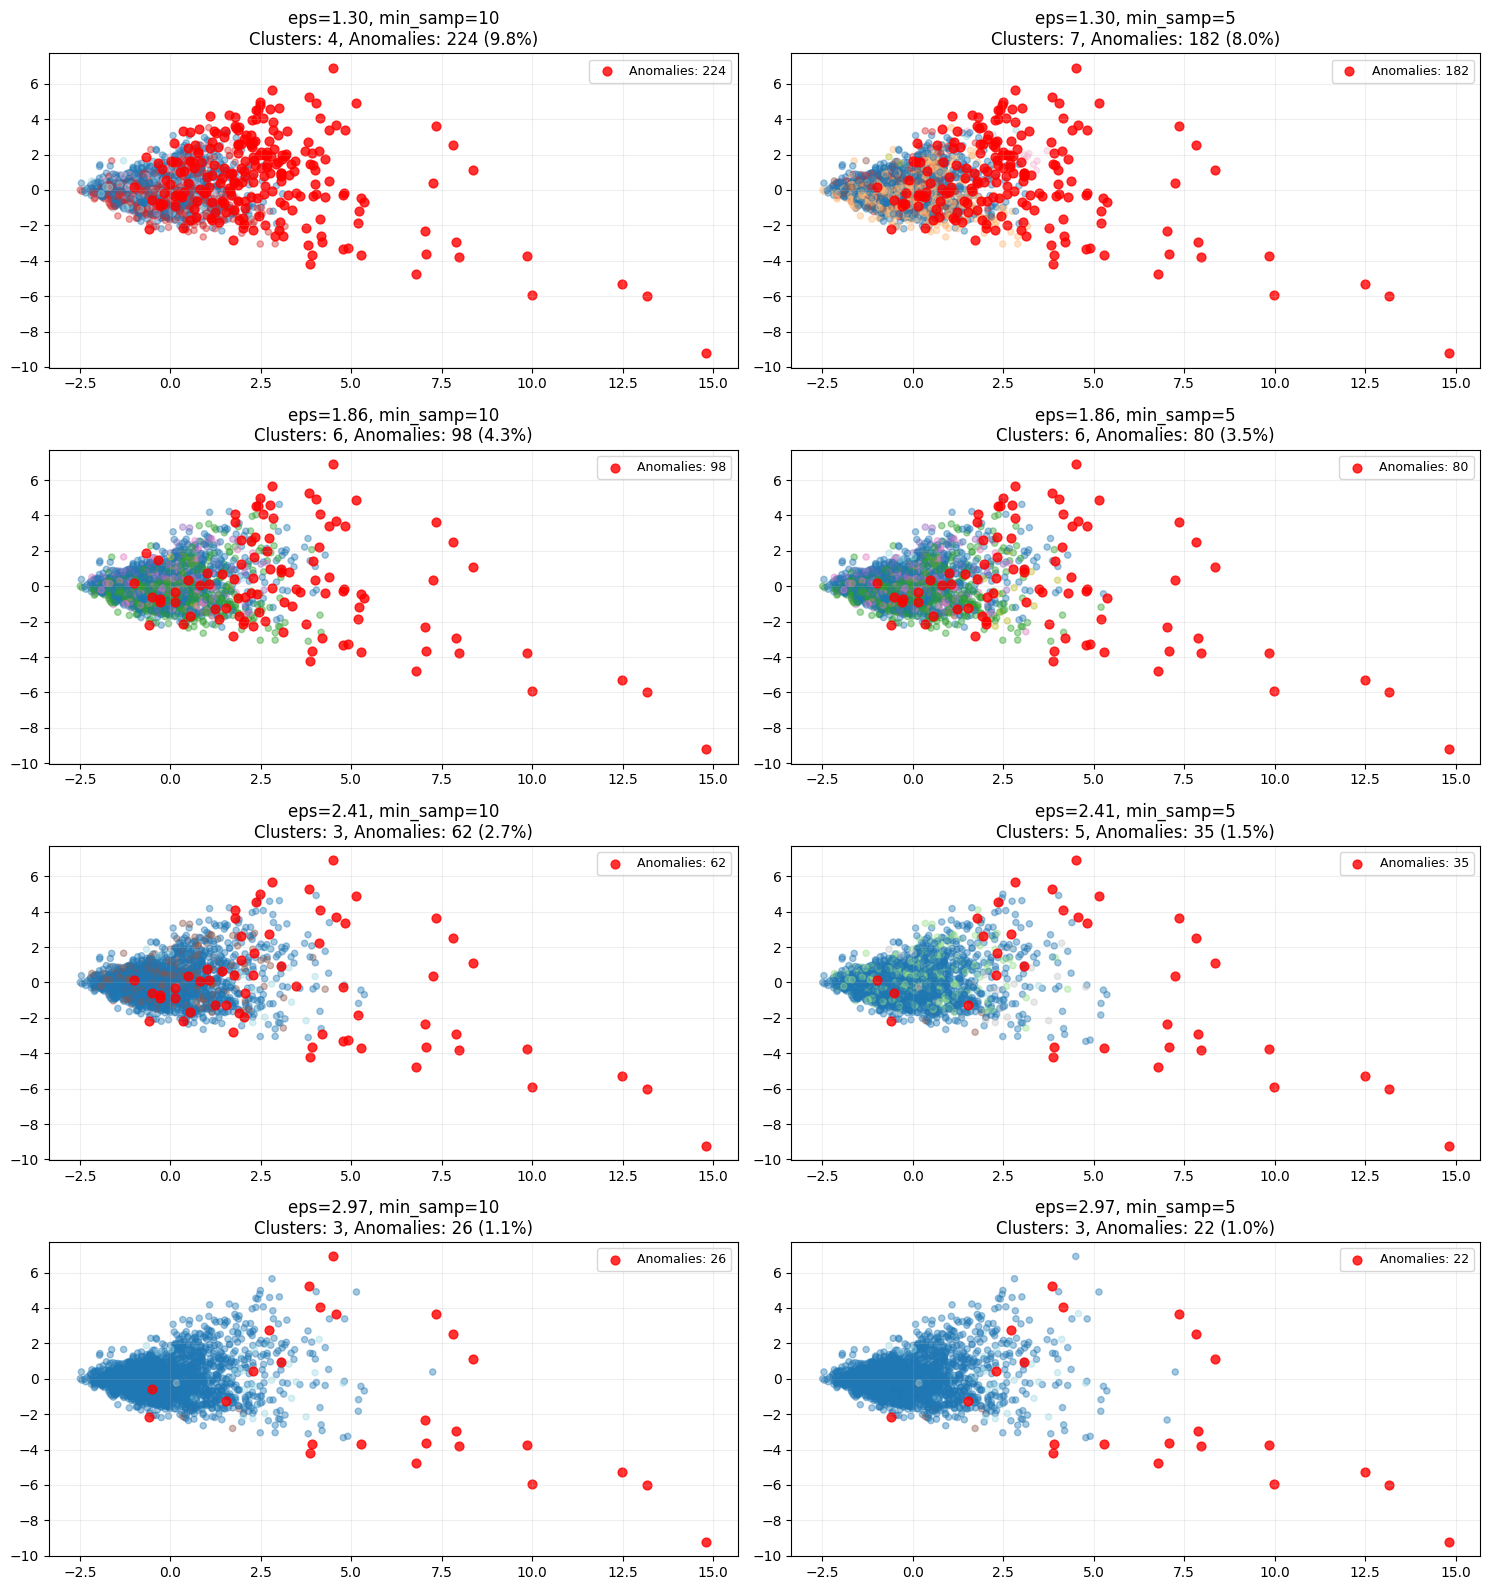


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
     eps  min_samples  n_clusters  n_anomalies  anomaly_ratio
1.299513           10           4          224       0.098332
1.299513            5           7          182       0.079895
1.856447           10           6           98       0.043020
1.856447            5           6           80       0.035119
2.413381           10           3           62       0.027217
2.413381            5           5           35       0.015364
2.970315           10           3           26       0.011414
2.970315            5           3           22       0.009658

РЕКОМЕНДАЦИИ ДЛЯ ПОИСКА АНОМАЛИЙ

 Рекомендуемая конфигурация для поиска аномалий (~5%):
   eps = 1.86
   min_samples = 10.0
   Ожидаемое количество аномалий: 98.0 (4.3%)
   Кластеров: 6.0

 Распределение аномалий по возрастным категориям:
   Middle-aged (30-59): 38/992 (3.8%)
   Senior (60+): 44/526 (8.4%)
   Young (0-29): 16/760 (2.1%)

ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ АНОМАЛИЙ


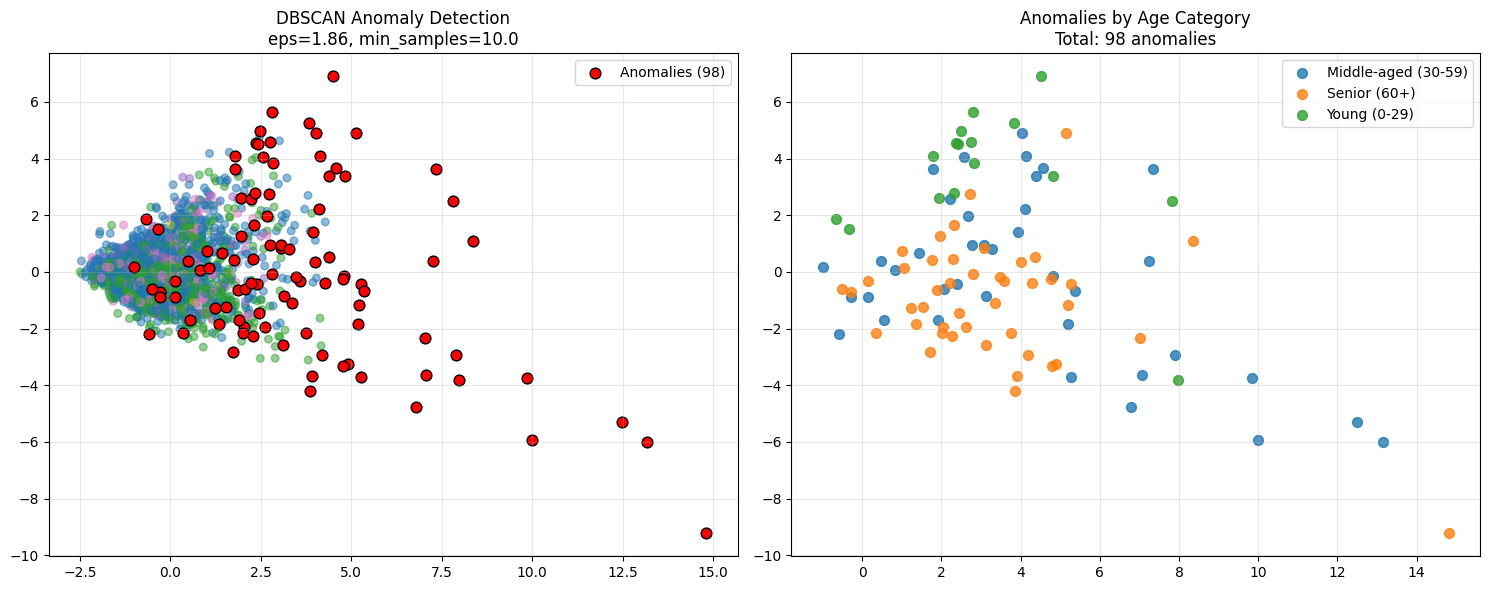


 Анализ аномалий завершен!


In [ ]:
print("\n" + "=" * 60)
print("5. DBSCAN FOR ANOMALY DETECTION")
print("=" * 60)

import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

n_samples, n_features = X_scaled.shape
print(f"\nДанные: {n_samples} образцов, {n_features} признаков")

# Рекомендованные параметры для поиска аномалий
min_samples = min(10, n_features * 2)
print(f"Рекомендовано min_samples: {min_samples}")

# Метод локтя для выбора eps
knn = NearestNeighbors(n_neighbors=min_samples)
knn.fit(X_scaled)
distances, _ = knn.kneighbors(X_scaled)

# Берем расстояние до min_samples-го соседа (последний в массиве)
k_distances = distances[:, -1]
sorted_distances = np.sort(k_distances)

# График для выбора eps
plt.figure(figsize=(12, 6))
plt.plot(range(len(sorted_distances)), sorted_distances, 'b-', linewidth=2)
plt.xlabel('Точки, отсортированные по расстоянию')
plt.ylabel(f'Расстояние до {min_samples}-го ближайшего соседа')
plt.title(f'Метод локтя для выбора eps (DBSCAN)\n{len(X_scaled)} точек, {n_features} признаков')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Автоматический выбор eps
def find_knee_point(sorted_values):
    """Находит точку 'локтя' на графике"""
    n = len(sorted_values)
    all_coords = np.vstack((range(n), sorted_values)).T

    # Первая и последняя точки
    first_point = all_coords[0]
    last_point = all_coords[-1]

    # Ищем точку с максимальным расстоянием до прямой
    max_distance = 0
    knee_point = n // 2  # значение по умолчанию

    for i in range(1, n-1):
        point = all_coords[i]

        # Расстояние от точки до прямой, соединяющей first и last
        numerator = np.abs(
            (last_point[1] - first_point[1]) * point[0] -
            (last_point[0] - first_point[0]) * point[1] +
            last_point[0] * first_point[1] -
            last_point[1] * first_point[0]
        )
        denominator = np.sqrt(
            (last_point[1] - first_point[1])**2 +
            (last_point[0] - first_point[0])**2
        )

        distance = numerator / denominator if denominator != 0 else 0

        if distance > max_distance:
            max_distance = distance
            knee_point = i

    return knee_point, sorted_values[knee_point]

knee_idx, optimal_eps = find_knee_point(sorted_distances)
print(f"\nОптимальный eps (метод локтя): {optimal_eps:.3f} на точке {knee_idx}/{len(sorted_distances)}")

# 6. Тестируем разные eps для поиска аномалий
print("\n" + "=" * 60)
print("ТЕСТИРОВАНИЕ РАЗНЫХ ПАРАМЕТРОВ ДЛЯ ПОИСКА АНОМАЛИЙ")
print("=" * 60)

# Для поиска аномалий тестируем разные eps
eps_options = [optimal_eps * 0.7, optimal_eps, optimal_eps * 1.3, optimal_eps * 1.6]
min_samples_options = [min_samples, min_samples // 2]

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

fig, axes = plt.subplots(len(eps_options), len(min_samples_options),
                         figsize=(15, 4*len(eps_options)))

if len(eps_options) == 1 or len(min_samples_options) == 1:
    axes = np.array(axes).reshape(len(eps_options), len(min_samples_options))

results_summary = []

for i, eps in enumerate(eps_options):
    for j, min_samp in enumerate(min_samples_options):
        # Применяем DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=int(min_samp), metric='euclidean')
        clusters = dbscan.fit_predict(X_scaled)

        # Анализ
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_anomalies = (clusters == -1).sum()
        anomaly_ratio = n_anomalies / len(clusters)

        # Визуализация в PCA пространстве
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        ax = axes[i, j]

        # Нормальные точки
        normal_mask = clusters != -1
        if normal_mask.any():
            ax.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1],
                      c=clusters[normal_mask], cmap='tab20', alpha=0.4, s=20)

        # Аномалии
        anomaly_mask = clusters == -1
        if anomaly_mask.any():
            ax.scatter(X_pca[anomaly_mask, 0], X_pca[anomaly_mask, 1],
                      c='red', alpha=0.8, s=40, label=f'Anomalies: {n_anomalies}')

        ax.set_title(f'eps={eps:.2f}, min_samp={min_samp}\n'
                    f'Clusters: {n_clusters}, Anomalies: {n_anomalies} ({anomaly_ratio:.1%})')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.2)

        # Сохраняем результаты
        results_summary.append({
            'eps': eps,
            'min_samples': min_samp,
            'n_clusters': n_clusters,
            'n_anomalies': n_anomalies,
            'anomaly_ratio': anomaly_ratio
        })

plt.tight_layout()
plt.show()

# 7. Вывод сводной таблицы
print("\n" + "=" * 60)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 60)

import pandas as pd
results_df = pd.DataFrame(results_summary)
print(results_df.to_string(index=False))

# 8. Рекомендация для поиска аномалий
print("\n" + "=" * 60)
print("РЕКОМЕНДАЦИИ ДЛЯ ПОИСКА АНОМАЛИЙ")
print("=" * 60)

target_anomaly_ratio = 0.05

best_config = None
best_diff = float('inf')

for _, row in results_df.iterrows():
    diff = abs(row['anomaly_ratio'] - target_anomaly_ratio)
    if diff < best_diff and row['n_clusters'] > 0:
        best_diff = diff
        best_config = row

if best_config is not None:
    print(f"\n Рекомендуемая конфигурация для поиска аномалий (~5%):")
    print(f"   eps = {best_config['eps']:.2f}")
    print(f"   min_samples = {best_config['min_samples']}")
    print(f"   Ожидаемое количество аномалий: {best_config['n_anomalies']} ({best_config['anomaly_ratio']:.1%})")
    print(f"   Кластеров: {best_config['n_clusters']}")

    # Применяем рекомендованную конфигурацию
    final_dbscan = DBSCAN(eps=best_config['eps'],
                         min_samples=int(best_config['min_samples']))
    final_clusters = final_dbscan.fit_predict(X_scaled)

    # Анализ аномалий по возрастным категориям
    print(f"\n Распределение аномалий по возрастным категориям:")
    anomaly_by_age = {}

    for age_cat in np.unique(y):
        age_mask = (y == age_cat)
        n_age_total = age_mask.sum()
        n_age_anomalies = ((final_clusters == -1) & age_mask).sum()
        anomaly_by_age[age_cat] = {
            'total': n_age_total,
            'anomalies': n_age_anomalies,
            'ratio': n_age_anomalies / n_age_total if n_age_total > 0 else 0
        }

    for age_cat, stats in anomaly_by_age.items():
        print(f"   {age_cat}: {stats['anomalies']}/{stats['total']} "
              f"({stats['ratio']:.1%})")

# Визуализация финальных результатов
print("\n" + "=" * 60)
print("ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ АНОМАЛИЙ")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Левая панель: все точки
if 'final_clusters' in locals():
    # PCA проекция
    pca_final = PCA(n_components=2)
    X_pca_final = pca_final.fit_transform(X_scaled)

    # Нормальные точки
    normal_final = final_clusters != -1
    scatter1 = ax1.scatter(X_pca_final[normal_final, 0], X_pca_final[normal_final, 1],
                          c=final_clusters[normal_final], cmap='tab20',
                          alpha=0.5, s=30)

    # Аномалии
    anomalies_final = final_clusters == -1
    ax1.scatter(X_pca_final[anomalies_final, 0], X_pca_final[anomalies_final, 1],
               c='red', s=60, edgecolors='black', linewidth=1,
               label=f'Anomalies ({(anomalies_final).sum()})')

    ax1.set_title(f'DBSCAN Anomaly Detection\neps={best_config["eps"]:.2f}, '
                  f'min_samples={best_config["min_samples"]}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Правая панель: только аномалии с возрастными метками
    if anomalies_final.any():
        anomaly_colors = []
        anomaly_labels = []

        for age_cat in np.unique(y):
            age_mask = (y == age_cat)
            age_anomaly_mask = anomalies_final & age_mask

            if age_anomaly_mask.any():
                ax2.scatter(X_pca_final[age_anomaly_mask, 0],
                           X_pca_final[age_anomaly_mask, 1],
                           label=f'{age_cat}', alpha=0.8, s=50)

        ax2.set_title(f'Anomalies by Age Category\nTotal: {anomalies_final.sum()} anomalies')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No anomalies found',
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('No Anomalies Detected')

plt.tight_layout()
plt.show()

print("\n Анализ аномалий завершен!")